In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [5]:
df.shape

(48895, 16)

In [6]:
#Selecting Variable for Dropping and Preprocessing
df.neighbourhood.nunique()

221

In [7]:
df.neighbourhood.unique()[:5]

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem'],
      dtype=object)

In [8]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
df.neighbourhood_group.nunique()

5

In [10]:
df.room_type.nunique()

3

In [11]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [12]:
df.minimum_nights.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36],
      dtype=int64)

In [13]:
df.host_name.nunique()

11452

In [14]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [16]:
#Preprocessing
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
drop_lst = ["id","name" , "host_id" , "host_name" , "neighbourhood"]
df.drop(drop_lst , axis = 1 , inplace = True)
df.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [18]:
df.dropna(axis = 0 , inplace = True)
df.shape

(38843, 11)

In [19]:
df.isna().sum()

neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [20]:
#Splitting categorical and numerical columns
s = (df.dtypes == 'object')
obj_cols =list(s[s].index)
obj_cols

['neighbourhood_group', 'room_type', 'last_review']

In [21]:
int_cols_data = df.select_dtypes(exclude = ["object"])
int_cols_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129


In [22]:
obj_cols_data = df[obj_cols]
obj_cols_data.head()

,neighbourhood_group,room_type,last_review
0,Brooklyn,Private room,2018-10-19
1,Manhattan,Entire home/apt,2019-05-21
3,Brooklyn,Entire home/apt,2019-07-05
4,Manhattan,Entire home/apt,2018-11-19
5,Manhattan,Entire home/apt,2019-06-22


In [23]:
#Preprocessing Object columns
neigh = pd.get_dummies(obj_cols_data["neighbourhood_group"])
neigh.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island
0,0,1,0,0,0
1,0,0,1,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0


In [24]:
room_type = pd.get_dummies(obj_cols_data["room_type"])
room_type.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
3,1,0,0
4,1,0,0
5,1,0,0


In [25]:
obj_cols_data[["year" ,"month" , "day"]] = (obj_cols_data["last_review"].str.split("-" , expand = True))
obj_cols_data.head()

C:\Users\aradh\anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,neighbourhood_group,room_type,last_review,year,month,day
0,Brooklyn,Private room,2018-10-19,2018,10,19
1,Manhattan,Entire home/apt,2019-05-21,2019,05,21
3,Brooklyn,Entire home/apt,2019-07-05,2019,07,05
4,Manhattan,Entire home/apt,2018-11-19,2018,11,19
5,Manhattan,Entire home/apt,2019-06-22,2019,06,22


In [26]:
concat = [neigh ,room_type , obj_cols_data[["year" ,"month" ,"day"]] ]
final_obj_cols = pd.concat(concat, axis = 1)
final_obj_cols.head()

,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,year,month,day
0,0,1,0,0,0,0,1,0,2018,10,19
1,0,0,1,0,0,1,0,0,2019,05,21
3,0,1,0,0,0,1,0,0,2019,07,05
4,0,0,1,0,0,1,0,0,2018,11,19
5,0,0,1,0,0,1,0,0,2019,06,22


In [27]:
#Creating Final data
lst= [int_cols_data,final_obj_cols ]
data = pd.concat(lst , axis =1)
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,year,month,day
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0,2018,10,19
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,2019,05,21
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,2019,07,05
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,2018,11,19
5,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0,2019,06,22


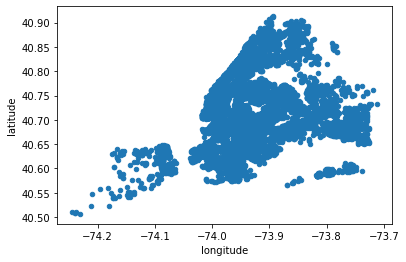

In [28]:
#Data Visualization
data.plot(kind ="scatter" , x = "longitude" , y = "latitude")

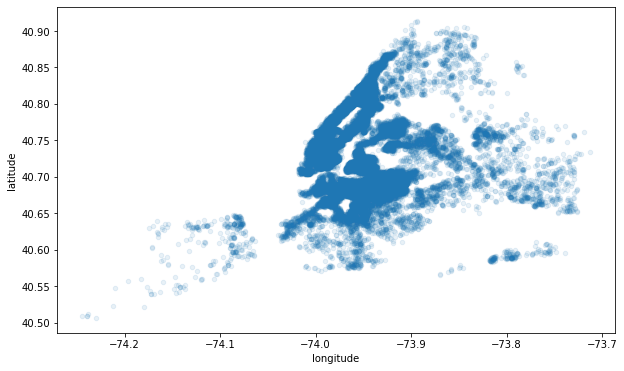

In [29]:
#High Density Areas
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, figsize = (10 , 6))

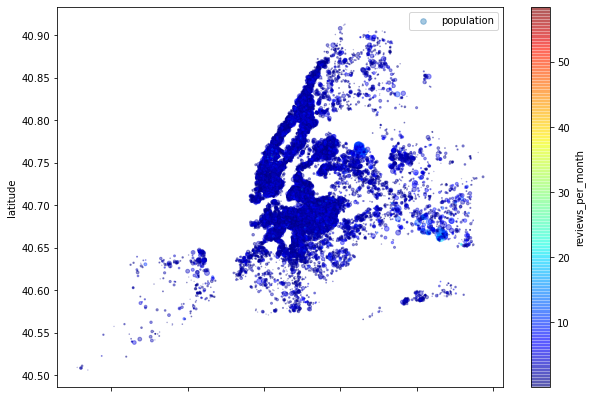

In [30]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=data["number_of_reviews"]/10, label="population", figsize=(10,7),
c="reviews_per_month", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

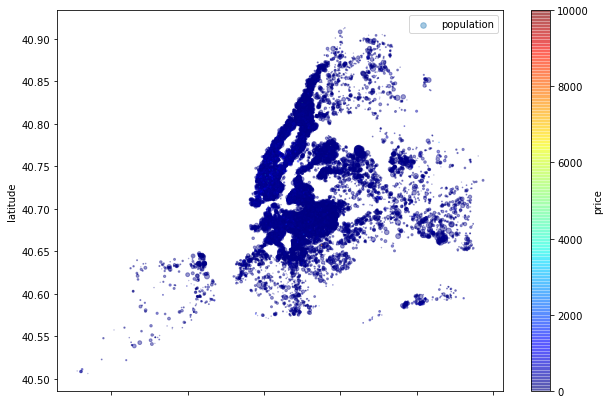

In [31]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=data["number_of_reviews"]/10, label="population", figsize=(10,7),
c="price", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C2C3EF430>,
      dtype=object)

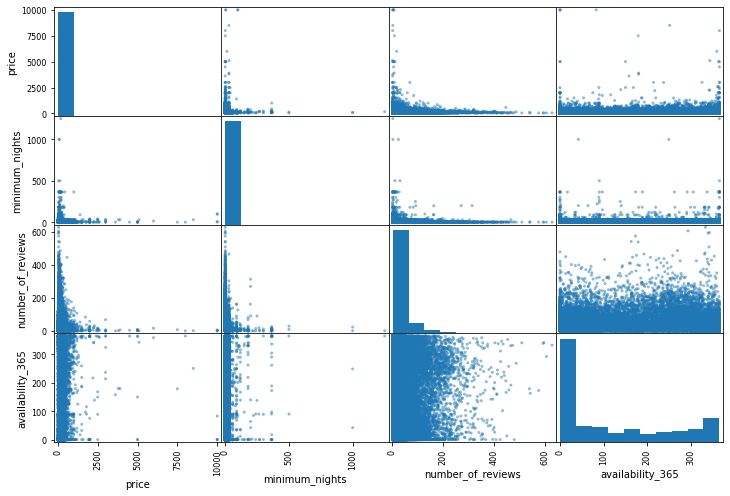

In [32]:
from pandas.plotting import scatter_matrix
attributes = ["price", "minimum_nights", "number_of_reviews",
"availability_365"]
scatter_matrix(data[attributes], figsize=(12, 8))

In [33]:
#Preparing Data For Machine Learning Model
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,year,month,day
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,0,0,0,0,1,0,2018,10,19
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,1,0,0,1,0,0,2019,05,21
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,0,0,0,1,0,0,2019,07,05
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,1,0,0,1,0,0,2018,11,19
5,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,1,0,0,1,0,0,2019,06,22


In [35]:
data.year = data.year.astype('int')
data.month = data.month.astype('int')
data.day = data.day.astype('int')

In [36]:
data.year = data.year/1000
data.month = data.month/10
data.day = data.day/10


In [37]:
data.latitude = data.latitude/100
data.longitude = data.longitude/100
data.price = data.price/100
data.number_of_reviews = data.number_of_reviews/100
data.minimum_nights = data.minimum_nights/100
data.calculated_host_listings_count = data.calculated_host_listings_count/10
data.availability_365= data.availability_365/100

In [38]:
data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Bronx,Brooklyn,Manhattan,Queens,Staten Island,Entire home/apt,Private room,Shared room,year,month,day
0,0.406475,-0.739724,1.49,0.01,0.09,0.21,0.6,3.65,0,1,0,0,0,0,1,0,2.018,1.0,1.9
1,0.407536,-0.739838,2.25,0.01,0.45,0.38,0.2,3.55,0,0,1,0,0,1,0,0,2.019,0.5,2.1
3,0.406851,-0.739598,0.89,0.01,2.70,4.64,0.1,1.94,0,1,0,0,0,1,0,0,2.019,0.7,0.5
4,0.407985,-0.739440,0.80,0.10,0.09,0.10,0.1,0.00,0,0,1,0,0,1,0,0,2.018,1.1,1.9
5,0.407477,-0.739750,2.00,0.03,0.74,0.59,0.1,1.29,0,0,1,0,0,1,0,0,2.019,0.6,2.2


In [39]:
#Training Data
X = data.drop("price" ,axis = 1)
Y = data.price
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.3 , shuffle = True)
len(X_train) , len(X_test) , len(Y_train) , len(Y_test)

(27190, 11653, 27190, 11653)

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
param_grid = [
{'n_estimators' : [3 , 10 , 30], 'max_features' : [2 , 4 , 6 , 8]},
{'bootstrap':[False] ,'n_estimators' : [3 , 10 ] , "max_features" : [2 ,3 ,4 ]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg , param_grid , cv = 5 , scoring = 'neg_mean_squared_error' ,return_train_score= False)
grid_search.fit(X ,Y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [43]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [44]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [46]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

2.1457688131320847 {'max_features': 2, 'n_estimators': 3}
1.9244329465483685 {'max_features': 2, 'n_estimators': 10}
1.841933737900105 {'max_features': 2, 'n_estimators': 30}
2.067927394027625 {'max_features': 4, 'n_estimators': 3}
1.898099280808675 {'max_features': 4, 'n_estimators': 10}
1.8331855261369783 {'max_features': 4, 'n_estimators': 30}
2.1442434705106828 {'max_features': 6, 'n_estimators': 3}
1.9525624379538755 {'max_features': 6, 'n_estimators': 10}
1.869868343607902 {'max_features': 6, 'n_estimators': 30}
2.153808084432639 {'max_features': 8, 'n_estimators': 3}
1.909447038396541 {'max_features': 8, 'n_estimators': 10}
1.8636575755530327 {'max_features': 8, 'n_estimators': 30}
2.068834212416629 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
1.8991893687183146 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.0369810955300403 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
1.9046581935820466 {'bootstrap': False, 'max_features': 3, 'n_estima